In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.io import fits
from astropy.table import Table
from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord
import importlib

In [2]:
import sys
sys.path.append(os.environ['HOME']+'/Documents/GitHub/observing-program/py')
import grism_dispersion

In [3]:
import footprintutils as fp

In [60]:
importlib.reload(fp)

<module 'footprintutils' from '/Users/ross.1333/Documents/GitHub/observing-program/py/footprintutils.py'>

In [4]:
import roman_coords_transform as ctrans

In [6]:
roman_base_dir = os.getenv('HOME')+'/Dropbox/RomanGRS/products/'
code_data_dir = os.getenv('HOME')+'/Documents/GitHub/observing-program/data/'

In [8]:
rctrans = ctrans.RomanCoordsTransform(file_path=code_data_dir)

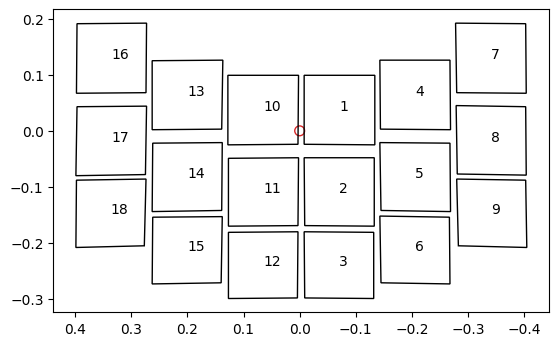

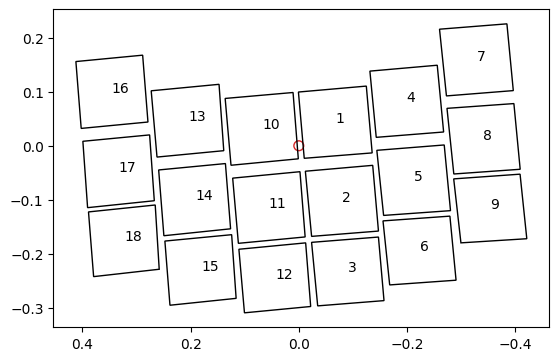

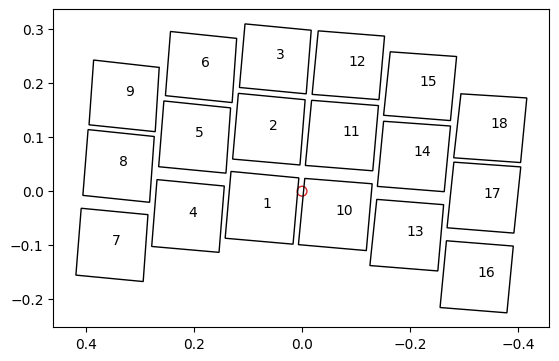

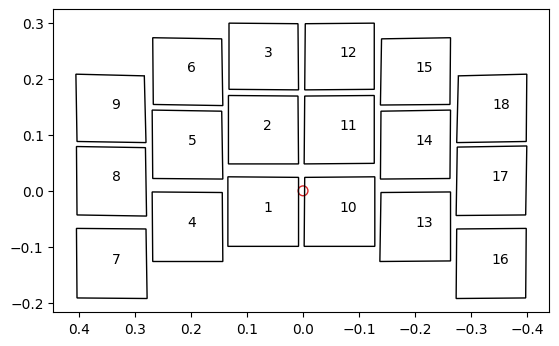

In [47]:
#RA = 119.553626911345
#Dec = -60.801287288033194
#PA = 35.
RA = 0
Dec = 0
#PA = 0
PAs = [0,5,175,180]
for PA in PAs:
    dfoot = rctrans.wfi_sky_pointing(RA, Dec, PA, ds9=False)

In [36]:
dfoot[0]

{'rot': array([[-1.0000000e+00, -1.2246468e-16],
        [ 1.2246468e-16, -1.0000000e+00]]),
 'PA': 0,
 1: {'ra_cen': -0.07100001480425686,
  'dec_cen': 0.03699999999999999,
  'centers': [-0.071, 0.03699999999999999],
  'vertices': array([[-0.1340002 ,  0.099     ],
         [-0.13400001, -0.025     ],
         [-0.008     , -0.024     ],
         [-0.00800001,  0.099     ]])},
 2: {'ra_cen': -0.07100012848035826,
  'dec_cen': -0.10900000000000001,
  'centers': [-0.07099999999999998, -0.10900000000000001],
  'vertices': array([[-0.13300005, -0.048     ],
         [-0.13300059, -0.17      ],
         [-0.00900004, -0.169     ],
         [-0.008     , -0.048     ]])},
 3: {'ra_cen': -0.07000061411320795,
  'dec_cen': -0.24,
  'centers': [-0.06999999999999998, -0.24],
  'vertices': array([[-0.13200066, -0.181     ],
         [-0.1320018 , -0.299     ],
         [-0.00900012, -0.298     ],
         [-0.00800004, -0.18      ]])},
 4: {'ra_cen': -0.2060001285145008,
  'dec_cen': 0.0639999999

In [ ]:
myconf = grism_dispersion.aXeConf(conf_file=roman_base_dir+"configuration/Roman.det1.07242020.conf")

In [23]:
strdir = roman_base_dir+"configuration/"
strdir

'/Users/ross.1333/Dropbox/RomanGRS/products/configuration/'

In [24]:
!ls /Users/ross.1333/Dropbox/RomanGRS/products/configuration/

Roman.det1.07242020.conf  Roman.det2.07242020.conf  index.html?C=D;O=D
Roman.det10.07242020.conf Roman.det3.07242020.conf  index.html?C=M;O=A
Roman.det11.07242020.conf Roman.det4.07242020.conf  index.html?C=M;O=D
Roman.det12.07242020.conf Roman.det5.07242020.conf  index.html?C=N;O=A
Roman.det13.07242020.conf Roman.det6.07242020.conf  index.html?C=N;O=D
Roman.det14.07242020.conf Roman.det7.07242020.conf  index.html?C=S;O=A
Roman.det15.07242020.conf Roman.det8.07242020.conf  index.html?C=S;O=D
Roman.det16.07242020.conf Roman.det9.07242020.conf  irsa.ipac.caltech.edu
Roman.det17.07242020.conf index.html                sens_0720_2020.fits
Roman.det18.07242020.conf index.html?C=D;O=A


In [61]:
htest = fp.fake_header(53.22491146968, -27.82350140649,crota2=0)
wtest = WCS(htest)
wtest

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 53.22491146968 -27.82350140649 
CRPIX : 2044.0 2044.0 
CD1_1 CD1_2  : -3.0555555555555e-05 -0.0 
CD2_1 CD2_2  : -0.0 3.05555555555555e-05 
NAXIS : 4088  4088

In [62]:
htest = fp.fake_header(53.22491146968, -27.82350140649,crota2=180)
wtest180 = WCS(htest)
wtest180

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 53.22491146968 -27.82350140649 
CRPIX : 2044.0 2044.0 
CD1_1 CD1_2  : 3.05555555555555e-05 -3.741976330728e-21 
CD2_1 CD2_2  : -3.741976330728e-21 -3.0555555555555e-05 
NAXIS : 4088  4088

In [64]:
ra,dec = 53.22491146968,-27.81
coords_test = SkyCoord(ra=ra*u.degree,dec=dec*u.degree, frame='icrs')
print(wtest.world_to_pixel(coords_test))
print(wtest180.world_to_pixel(coords_test))

(array(2043.), array(2484.86422058))
(array(2043.), array(1601.13577942))


In [59]:
wtest.pixel_to_world([1],[4]),wtest180.pixel_to_world([1],[4]),wtest.pixel_to_world([4000],[4000]),wtest180.pixel_to_world([4000],[4000])

(<SkyCoord (ICRS): (ra, dec) in deg
     [(53.24253442, -27.83899195)]>,
 <SkyCoord (ICRS): (ra, dec) in deg
     [(53.20729354, -27.80800862)]>,
 <SkyCoord (ICRS): (ra, dec) in deg
     [(53.10448537, -27.71684109)]>,
 <SkyCoord (ICRS): (ra, dec) in deg
     [(53.34557432, -27.93005704)]>)

In [25]:
min_lam_4foot = 10000
max_lam_4foot = 19300
all_dx = np.arange(-400,600)

In [35]:
def test_foot(xpix,ypix,min_pix=0,max_pix=4088,det='1'):
    conf = grism_dispersion.aXeConf(conf_file=roman_base_dir+"configuration/Roman.det"+str(det)+".07242020.conf")
    dy,lam = conf.get_beam_trace(x=xpix, y=ypix, dx=all_dx, beam='A')
    sel_lam = lam > max_lam_4foot
    sel_lam |= lam < min_lam_4foot
    dx_sel = all_dx[~sel_lam]
    dy_sel = dy[~sel_lam]
    if xpix+dx_sel[0] >= 0 and xpix+dx_sel[-1] < 4088 and ypix+dy_sel[0] >= 0 and ypix+dy_sel[-1] < 4088 and ypix+dy_sel[0] < 4088 and ypix+dy_sel[-1] >= 0:
        return 1
    else:
        return 0

In [9]:
test_foot(500,500)

1

In [27]:
def mkgrid(ra,dec,sz,res):    
    ral = np.arange(ra-sz/2,ra+sz/2,sz/res)
    decl = np.arange(dec-sz/2,dec+sz/2,sz/res)
    if len(ral) != len(decl):
        print('error, mismatched ra/dec lists!')
        return
    ral_tot  = []
    decl_tot = []
    for i in range(0,len(ral)):
        for j in range(0,len(ral)):
            ral_tot.append(ral[i])
            decl_tot.append(decl[j])
    return ral_tot,decl_tot

In [55]:
ral_tot,decl_tot = mkgrid(0,0,1,1000)

In [56]:
coords = SkyCoord(ra=ral_tot*u.degree,dec=decl_tot*u.degree, frame='icrs')

In [39]:
def get_pixl(coords,detfoot,detnum,PA):
    ra = detfoot[0][int(detnum)]['ra_cen']
    dec = detfoot[0][int(detnum)]['dec_cen']
    h = fp.fake_header(ra, dec,crota2=PA)
    w = WCS(h)
    pixels = w.world_to_pixel(coords)
    return pixels

1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
1 5
2 5
3 5
4 5
5 5
6 5
7 5
8 5
9 5
10 5
11 5
12 5
13 5
14 5
15 5
16 5
17 5
18 5
1 175
2 175
3 175
4 175
5 175
6 175
7 175
8 175
9 175
10 175
11 175
12 175
13 175
14 175
15 175
16 175
17 175
18 175
1 180
2 180
3 180
4 180
5 180
6 180
7 180
8 180
9 180
10 180
11 180
12 180
13 180
14 180
15 180
16 180
17 180
18 180


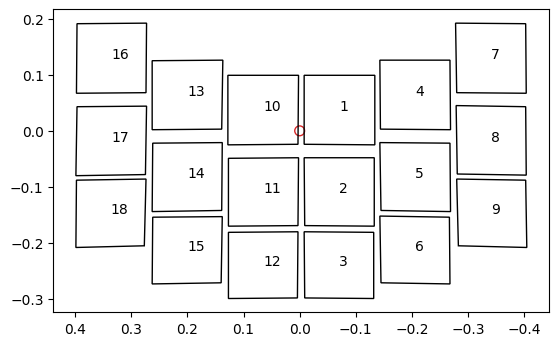

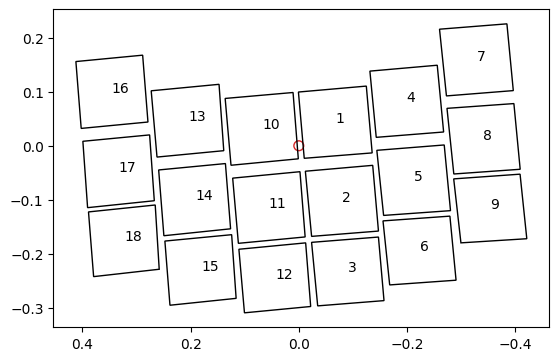

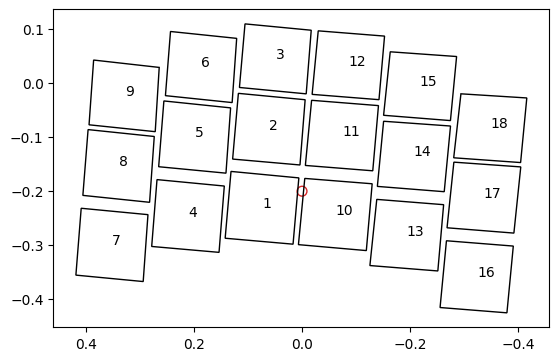

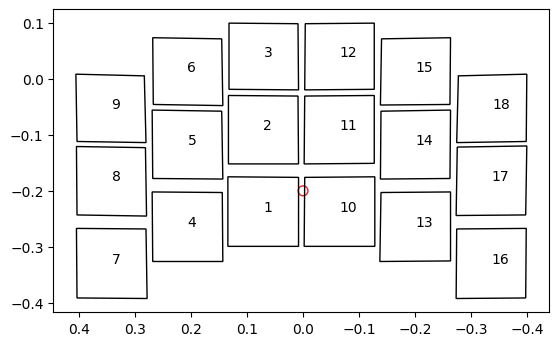

In [57]:
nobs = np.zeros(len(ral_tot))
rolls = [0,5,175,180]
dec_offs = [0,0,-.2,-.2]
ra = 0
dec = 0
nc = 10
dets = np.arange(1,19)
for PA,dec_off in zip(rolls,dec_offs):
    dfoot = rctrans.wfi_sky_pointing(ra, dec+dec_off, PA, ds9=False)
    for det in dets:
        pixels = get_pixl(coords,dfoot,det,PA)
        for i in range(0,len(pixels[0])):
            xpix = pixels[0][i]
            ypix = pixels[1][i]
            test = test_foot(xpix,ypix)
            nobs[i] += test
            #if i % (len(pixels[0])/nc) == 0:
        print(det,PA)

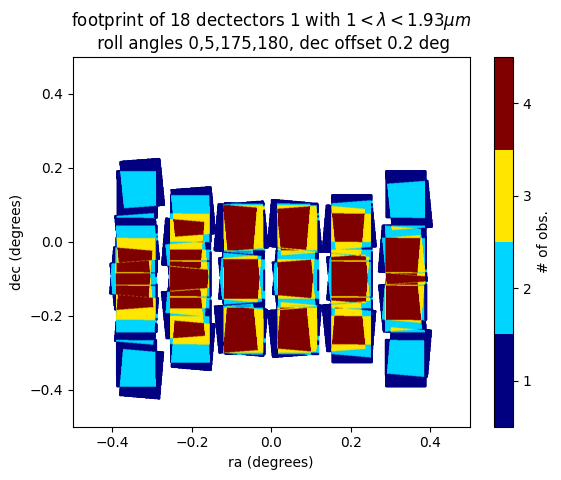

In [58]:
cmap = plt.get_cmap('jet', 4)
sel = nobs > 0
plt.scatter(np.array(ral_tot)[sel],np.array(decl_tot)[sel],c=nobs[sel],s=.1,cmap=cmap,vmin=0.5,vmax=4.5)
plt.colorbar(ticks=np.arange(1,5 ),label='# of obs.')#norm=norm, cmap=cmap)#,cax=ax)#,
#             cax=ax, orientation='horizontal',
#             label="Discrete intervals with extend='both' keyword")
#plt.colorbar(levels=[0,1,2,3,4])
plt.xlim(min(ral_tot),max(ral_tot))
plt.ylim(min(decl_tot),max(decl_tot))
plt.xlabel('ra (degrees)')
plt.ylabel('dec (degrees)')
plt.title(r'footprint of 18 dectectors 1 with $1<\lambda<1.93 \mu m$'+'\n roll angles 0,5,175,180, dec offset 0.2 deg')
plt.show()

In [ ]:
rolls = [0,5,175,180]
dets = np.arange(1,19)

pix_list = []
for roll in rolls:
    h = fp.fake_header(0, 0,crota2=roll)
    w = WCS(h)
    pixels = w.world_to_pixel(coords)
    pix_list.append(pixels)

In [96]:
nc = 10
npix = len(pix_list[0][0])
3 % (npix/nc)

3.0

In [97]:
3%100000

3

In [98]:
nobs = np.zeros(len(ral_tot))
for pixels in pix_list:
    for i in range(0,len(pixels[0])):
        xpix = pixels[0][i]
        ypix = pixels[1][i]
        test = test_foot(xpix,ypix)
        nobs[i] += test
        if i % (npix/nc) == 0:
            print(i,npix)

0 1000000
100000 1000000
200000 1000000
300000 1000000
400000 1000000
500000 1000000
600000 1000000
700000 1000000
800000 1000000
900000 1000000
0 1000000
100000 1000000
200000 1000000
300000 1000000
400000 1000000
500000 1000000
600000 1000000
700000 1000000
800000 1000000
900000 1000000
0 1000000
100000 1000000
200000 1000000
300000 1000000
400000 1000000
500000 1000000
600000 1000000
700000 1000000
800000 1000000
900000 1000000
0 1000000
100000 1000000
200000 1000000
300000 1000000
400000 1000000
500000 1000000
600000 1000000
700000 1000000
800000 1000000
900000 1000000


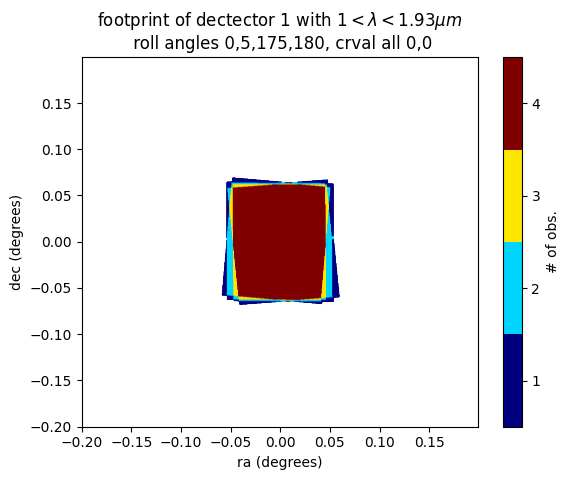

In [99]:
#fig, ax = plt.subplots()

#cmap = mpl.cm.viridis
#bounds = [0,1,2,3,4]
#norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
cmap = plt.get_cmap('jet', 4)
sel = nobs > 0
plt.scatter(np.array(ral_tot)[sel],np.array(decl_tot)[sel],c=nobs[sel],s=.1,cmap=cmap,vmin=0.5,vmax=4.5)
plt.colorbar(ticks=np.arange(1,5 ),label='# of obs.')#norm=norm, cmap=cmap)#,cax=ax)#,
#             cax=ax, orientation='horizontal',
#             label="Discrete intervals with extend='both' keyword")
#plt.colorbar(levels=[0,1,2,3,4])
plt.xlim(min(ral_tot),max(ral_tot))
plt.ylim(min(decl_tot),max(decl_tot))
plt.xlabel('ra (degrees)')
plt.ylabel('dec (degrees)')
plt.title(r'footprint of dectector 1 with $1<\lambda<1.93 \mu m$'+'\n roll angles 0,5,175,180, crval all 0,0')
plt.show()

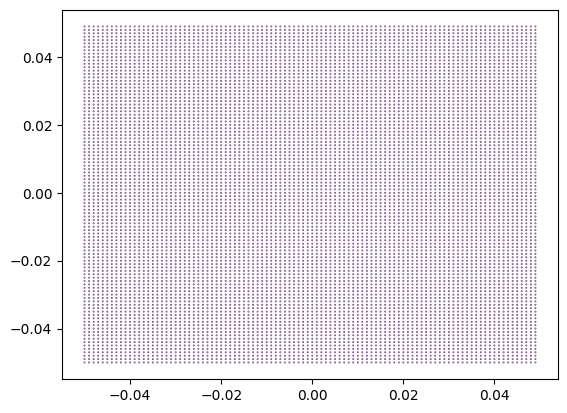

In [ ]:
sky = w.pixel_to_world(30, 40)

In [37]:
sky.ra.degree,sky.dec.degree

(53.21898674983362, -27.82369153090185)

In [39]:
w.world_to_pixel(sky)

(array(30.), array(40.))

In [134]:
w170.world_to_pixel(sky)

(array(30.), array(40.))

1

In [49]:
w.world_to_pixel(SkyCoord(ra=53.218987*u.degree, dec=-27.82369*u.degree, frame='icrs'))

(array(30.15953453), array(39.85036192))

In [67]:
w.world_to_pixel(SkyCoord(ra=53.2*u.degree, dec=-27.85*u.degree, frame='icrs'))

(array(-3860.70975335), array(1391.98827722))

In [69]:
mask = np.zeros((100,100),dtype=bool)

In [127]:
pixels = w.world_to_pixel(coords)

In [98]:
len(pixels[0])

10000

In [104]:
min(pixels[1]),max(pixels[1])

(-4063.3623357724837, 15178.972042855748)

In [117]:
ral_tot[0].value

53.2

In [128]:
ra_inl = []
dec_inl = []
ra_outl = []
dec_outl = []

for i in range(0,len(pixels[0])):
    xpix = pixels[0][i]
    ypix = pixels[1][i]
    test = test_foot(xpix,ypix)
    if test == 1:
        ra_inl.append(ral_tot[i].value)
        dec_inl.append(decl_tot[i].value)
    else:
        ra_outl.append(ral_tot[i].value)
        dec_outl.append(decl_tot[i].value)
        

In [132]:
pixels170 = w170.world_to_pixel(coords)

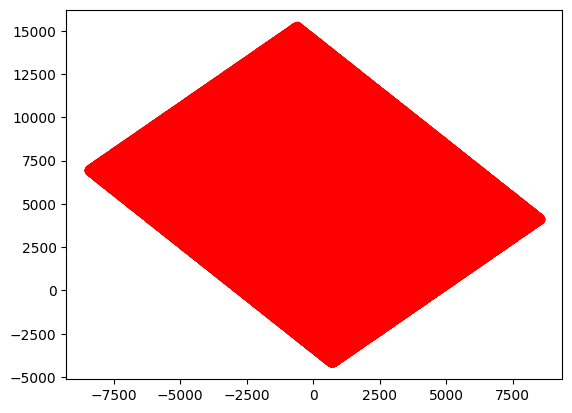

In [133]:
plt.plot(pixels170[0],pixels170[1],'ro')
plt.show()

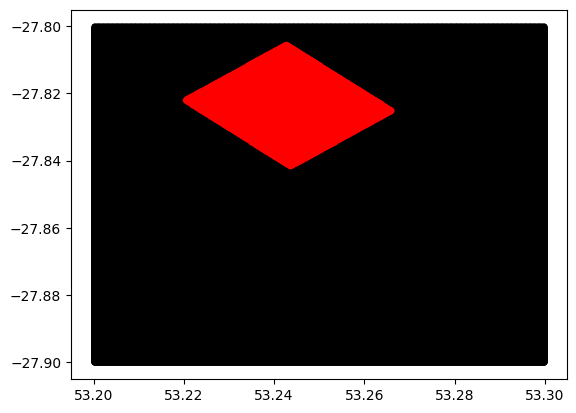

In [129]:
plt.plot(ra_outl,dec_outl,'k.')
plt.plot(ra_inl,dec_inl,'r.')
plt.show()

In [113]:
ra_inl.degree

AttributeError: 'list' object has no attribute 'degree'

In [26]:
myconf.orders['A']

2

In [29]:
lam

array([20536.53672434, 20525.56307763, 20514.58936853, 20503.61559706,
       20492.64176321, 20481.66786699, 20470.69390838, 20459.7198874 ,
       20448.74580404, 20437.77165831, 20426.79745019, 20415.8231797 ,
       20404.84884683, 20393.87445158, 20382.89999395, 20371.92547395,
       20360.95089157, 20349.97624681, 20339.00153967, 20328.02677015,
       20317.05193826, 20306.07704399, 20295.10208734, 20284.12706831,
       20273.1519869 , 20262.17684312, 20251.20163696, 20240.22636841,
       20229.25103749, 20218.2756442 , 20207.30018852, 20196.32467047,
       20185.34909003, 20174.37344722, 20163.39774203, 20152.42197446,
       20141.44614452, 20130.47025219, 20119.49429749, 20108.5182804 ,
       20097.54220094, 20086.5660591 , 20075.58985488, 20064.61358829,
       20053.63725931, 20042.66086796, 20031.68441422, 20020.70789811,
       20009.73131962, 19998.75467875, 19987.7779755 , 19976.80120987,
       19965.82438186, 19954.84749148, 19943.87053871, 19932.89352357,
      

In [30]:
sel_lam = lam > max_lam_4foot
sel_lam |= lam < min_lam_4foot

In [31]:
dx_sel = all_dx[~sel_lam]

In [32]:
dx_sel

array([-287, -286, -285, -284, -283, -282, -281, -280, -279, -278, -277,
       -276, -275, -274, -273, -272, -271, -270, -269, -268, -267, -266,
       -265, -264, -263, -262, -261, -260, -259, -258, -257, -256, -255,
       -254, -253, -252, -251, -250, -249, -248, -247, -246, -245, -244,
       -243, -242, -241, -240, -239, -238, -237, -236, -235, -234, -233,
       -232, -231, -230, -229, -228, -227, -226, -225, -224, -223, -222,
       -221, -220, -219, -218, -217, -216, -215, -214, -213, -212, -211,
       -210, -209, -208, -207, -206, -205, -204, -203, -202, -201, -200,
       -199, -198, -197, -196, -195, -194, -193, -192, -191, -190, -189,
       -188, -187, -186, -185, -184, -183, -182, -181, -180, -179, -178,
       -177, -176, -175, -174, -173, -172, -171, -170, -169, -168, -167,
       -166, -165, -164, -163, -162, -161, -160, -159, -158, -157, -156,
       -155, -154, -153, -152, -151, -150, -149, -148, -147, -146, -145,
       -144, -143, -142, -141, -140, -139, -138, -1